In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd 

In [2]:
# windows korean font settings (code may vary based on your OS and available fonts)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
check = pd.read_excel("상권분석/상권별/골목상권/점포수/점포수(2017_4분기_전분기_골목상권_업종전체_상권별현황).xlsx")
check

,행정구역,시군구코드,2017년2분기 전체점포수,2017년2분기 일반 점포수,2017년2분기 프랜차이즈 점포수,2017년3분기 전체점포수,2017년3분기 일반 점포수,2017년3분기 프랜차이즈 점포수,2017년4분기 전체점포수,2017년4분기 일반 점포수,2017년4분기 프랜차이즈 점포수
0,경기도,31,47767,44435,3332,48618,45164,3454,49211,45666,3545
1,수원시,3101,7079,6603,476,7215,6726,489,7290,6790,500
2,수원시 장안구,31011,2104,1973,131,2135,2002,133,2146,2013,133
3,경수대로_2,31011540,57,52,5,56,52,4,57,54,3
4,파장로,31011540,282,268,14,283,269,14,284,271,13
...,...,...,...,...,...,...,...,...,...,...,...
908,양동정류소,31580380,61,59,2,61,59,2,62,60,2
909,지평역,31580390,37,36,1,37,36,1,38,37,1
910,곡수길,31580390,13,13,0,13,13,0,13,13,0
911,용문시외버스터미널,31580400,60,59,1,59,58,1,61,60,1


In [11]:
# generate a combined dataframe of opening and closing rates for "발달상권", "골목상권", and "전통시장"

# import data for "발달상권"
baldal_path = "상권분석\상권별\발달상권\점포수"

bd_store_2017 = pd.read_excel(os.path.join(baldal_path, "점포수(2017_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2018 = pd.read_excel(os.path.join(baldal_path, "점포수(2018_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2019 = pd.read_excel(os.path.join(baldal_path, "점포수(2019_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2020 = pd.read_excel(os.path.join(baldal_path, "점포수(2020_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2021 = pd.read_excel(os.path.join(baldal_path, "점포수(2021_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2022 = pd.read_excel(os.path.join(baldal_path, "점포수(2022_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2023 = pd.read_excel(os.path.join(baldal_path, "점포수(2023_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))
bd_store_2024 = pd.read_excel(os.path.join(baldal_path, "점포수(2024_4분기_전분기_발달상권_업종전체_상권별현황).xlsx"))

# import data for "골목상권"
golmok_path = "상권분석\상권별\골목상권\점포수"

gm_store_2017 = pd.read_excel(os.path.join(golmok_path, "점포수(2017_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2018 = pd.read_excel(os.path.join(golmok_path, "점포수(2018_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2019 = pd.read_excel(os.path.join(golmok_path, "점포수(2019_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2020 = pd.read_excel(os.path.join(golmok_path, "점포수(2020_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2021 = pd.read_excel(os.path.join(golmok_path, "점포수(2021_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2022 = pd.read_excel(os.path.join(golmok_path, "점포수(2022_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2023 = pd.read_excel(os.path.join(golmok_path, "점포수(2023_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))
gm_store_2024 = pd.read_excel(os.path.join(golmok_path, "점포수(2024_4분기_전분기_골목상권_업종전체_상권별현황).xlsx"))

# import data  for "전통시장"
traditional_path = "상권분석\상권별\전통시장\점포수"
jt_store_2017 = pd.read_excel(os.path.join(traditional_path, "점포수(2017_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2018 = pd.read_excel(os.path.join(traditional_path, "점포수(2018_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2019 = pd.read_excel(os.path.join(traditional_path, "점포수(2019_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2020 = pd.read_excel(os.path.join(traditional_path, "점포수(2020_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2021 = pd.read_excel(os.path.join(traditional_path, "점포수(2021_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2022 = pd.read_excel(os.path.join(traditional_path, "점포수(2022_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2023 = pd.read_excel(os.path.join(traditional_path, "점포수(2023_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))
jt_store_2024 = pd.read_excel(os.path.join(traditional_path, "점포수(2024_4분기_전분기_전통시장_업종전체_상권별현황).xlsx"))

jt_store_2017

,행정구역,시군구코드,2017년2분기 전체점포수,2017년2분기 일반 점포수,2017년2분기 프랜차이즈 점포수,2017년3분기 전체점포수,2017년3분기 일반 점포수,2017년3분기 프랜차이즈 점포수,2017년4분기 전체점포수,2017년4분기 일반 점포수,2017년4분기 프랜차이즈 점포수
0,경기도,31,17493,16163,1330,17741,16361,1380,17876,16471,1405
1,수원시,3101,1480,1405,75,1503,1427,76,1521,1443,78
2,수원시 장안구,31011,325,306,19,333,315,18,335,317,18
3,북수원시장,31011540,176,167,9,178,170,8,178,170,8
4,정자시장,31011570,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
252,양평군,3158,582,549,33,591,558,33,594,561,33
253,양평물맑은시장,31580110,365,346,19,370,351,19,375,356,19
254,양수리전통시장,31580330,85,81,4,86,82,4,83,79,4
255,양동쌍학시장,31580380,0,0,0,0,0,0,0,0,0


In [12]:
# combine dataframes as needed 

from functools import reduce
import pandas as pd

# list of baldal market area dataframes 
bd_store_list = [
    bd_store_2017, bd_store_2018, bd_store_2019, bd_store_2020,
    bd_store_2021, bd_store_2022, bd_store_2023, bd_store_2024
]

# merge all dataframes on the same keys
bd_store = reduce(lambda left, right: pd.merge(left, right, on=["행정구역", "시군구코드"], how="inner"), bd_store_list)
# add a column that indicates the market area type
bd_store["상권유형"] = "발달상권"
# get rid of decimal marks in the population columns 
bd_store = bd_store.replace({',': ''}, regex=True)
# filter for "고양시(goyang city)"
bd_store = bd_store[bd_store["행정구역"] == "고양시"]

# list of golmok market area dataframes
gm_store_list = [
    gm_store_2017, gm_store_2018, gm_store_2019, gm_store_2020,
    gm_store_2021, gm_store_2022, gm_store_2023, gm_store_2024
]   
# merge all dataframes on the same keys
gm_store = reduce(lambda left, right: pd.merge(left, right, on=["행정구역", "시군구코드"], how="inner"), gm_store_list)
# add a column that indicates the market area type
gm_store["상권유형"] = "골목상권"
# get rid of decimal marks in the population columns
gm_store = gm_store.replace({',': ''}, regex=True)
# filter for "고양시(goyang city)"
gm_store = gm_store[gm_store["행정구역"] == "고양시"]

# list of jeontong market area dataframes
jt_store_list = [
    jt_store_2017, jt_store_2018, jt_store_2019, jt_store_2020,
    jt_store_2021, jt_store_2022, jt_store_2023, jt_store_2024
]
# merge all dataframes on the same keys
jt_store = reduce(lambda left, right: pd.merge(left, right, on=["행정구역", "시군구코드"], how="inner"), jt_store_list)
# add a column that indicates the market area type
jt_store["상권유형"] = "전통시장"
# get rid of decimal marks in the population columns 
jt_store = jt_store.replace({',': ''}, regex=True)
# filter for "고양시(goyang city)"
jt_store = jt_store[jt_store["행정구역"] == "고양시"]

# concatenate all market area dataframes into a single dataframe
combined_store = pd.concat([bd_store, gm_store, jt_store], ignore_index=True)
combined_store

,행정구역,시군구코드,2017년2분기 전체점포수,2017년2분기 일반 점포수,2017년2분기 프랜차이즈 점포수,2017년3분기 전체점포수,2017년3분기 일반 점포수,2017년3분기 프랜차이즈 점포수,2017년4분기 전체점포수,2017년4분기 일반 점포수,...,2024년2분기 전체점포수,2024년2분기 일반 점포수,2024년2분기 프랜차이즈 점포수,2024년3분기 전체점포수,2024년3분기 일반 점포수,2024년3분기 프랜차이즈 점포수,2024년4분기 전체점포수,2024년4분기 일반 점포수,2024년4분기 프랜차이즈 점포수,상권유형
0,고양시,3110,13323,12184,1139,13636,12470,1166,13871,12675,...,14637,13032,1605,14546,12978,1568,14531,12969,1562,발달상권
1,고양시,3110,4041,3770,271,4133,3850,283,4208,3925,...,4732,4345,387,4702,4322,380,4688,4307,381,골목상권
2,고양시,3110,196,188,8,195,186,9,200,190,...,224,209,15,222,206,16,220,204,16,전통시장


In [13]:
# filter 전체점포수 columns only 
totalstore_columns = [col for col in combined_store.columns if "전체점포수" in col]
filtered_totalstore_data = combined_store[["행정구역", "시군구코드", "상권유형"] + totalstore_columns]

# transverse the columns and rows for better readability
filtered_totalstore_data = filtered_totalstore_data.melt(id_vars=["행정구역", "시군구코드", "상권유형"], var_name="연도_분기", value_name="전체점포수")   

# make a year columns and quarter columns using the '연도_분기' column
filtered_totalstore_data[['연도', '분기']] = filtered_totalstore_data['연도_분기'].str.extract(r'(\d{4})년(\d+분기)')
del filtered_totalstore_data['연도_분기']
# convert '전체점포수' to numeric type
filtered_totalstore_data['전체점포수'] = pd.to_numeric(filtered_totalstore_data['전체점포수'], errors='coerce')
# sum up the population by year, quarter, and market area type
filtered_totalstore_data = filtered_totalstore_data.groupby(['연도', '상권유형']).agg({'전체점포수': 'sum'}).reset_index()
# drop values for year 2025 since it only contains data for 2분기
filtered_totalstore_data = filtered_totalstore_data[filtered_totalstore_data['연도'] != '2025']
filtered_totalstore_data

,연도,상권유형,전체점포수
0,2017,골목상권,12382
1,2017,발달상권,40830
2,2017,전통시장,591
3,2018,골목상권,12871
4,2018,발달상권,42906
5,2018,전통시장,643
6,2019,골목상권,13069
7,2019,발달상권,44714
8,2019,전통시장,699
9,2020,골목상권,13401


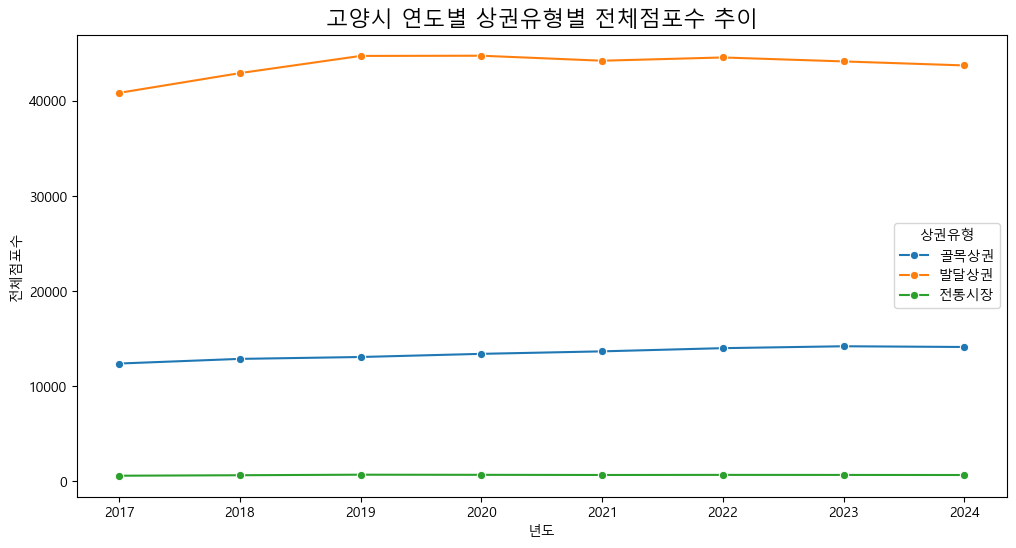

In [14]:
# plot the store counts by year and market area type
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_totalstore_data, x='연도', y='전체점포수', hue='상권유형', marker='o')
plt.title('고양시 연도별 상권유형별 전체점포수 추이', fontsize=16)
plt.xlabel('년도')
plt.ylabel('전체점포수')
plt.legend(title='상권유형')
plt.show()

In [16]:
# filter 일반수 columns only 
generalstore_columns = [col for col in combined_store.columns if "일반 점포수" in col]
filtered_generalstore_data = combined_store[["행정구역", "시군구코드", "상권유형"] + generalstore_columns]

# transverse the columns and rows for better readability
filtered_generalstore_data = filtered_generalstore_data.melt(id_vars=["행정구역", "시군구코드", "상권유형"], var_name="연도_분기", value_name="일반점포수")   

# make a year columns and quarter columns using the '연도_분기' column
filtered_generalstore_data[['연도', '분기']] = filtered_generalstore_data['연도_분기'].str.extract(r'(\d{4})년(\d+분기)')
del filtered_generalstore_data['연도_분기']
# convert '일반점포수' to numeric type
filtered_generalstore_data['일반점포수'] = pd.to_numeric(filtered_generalstore_data['일반점포수'], errors='coerce')
# sum up the population by year, quarter, and market area type
filtered_generalstore_data = filtered_generalstore_data.groupby(['연도', '상권유형']).agg({'일반점포수': 'sum'}).reset_index()
# drop values for year 2025 since it only contains data for 2분기
filtered_generalstore_data = filtered_generalstore_data[filtered_generalstore_data['연도'] != '2025']
filtered_generalstore_data

,연도,상권유형,일반점포수
0,2017,골목상권,11545
1,2017,발달상권,37329
2,2017,전통시장,564
3,2018,골목상권,12001
4,2018,발달상권,39123
5,2018,전통시장,614
6,2019,골목상권,12180
7,2019,발달상권,40642
8,2019,전통시장,658
9,2020,골목상권,12422


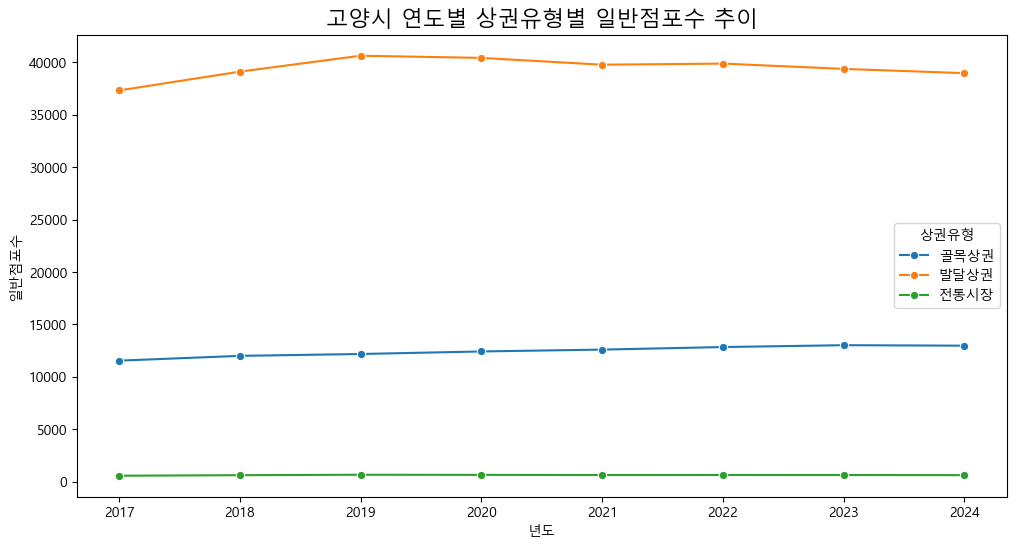

In [17]:
# plot the store counts by year and market area type
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_generalstore_data, x='연도', y='일반점포수', hue='상권유형', marker='o')
plt.title('고양시 연도별 상권유형별 일반점포수 추이', fontsize=16)
plt.xlabel('년도')
plt.ylabel('일반점포수')
plt.legend(title='상권유형')
plt.show()

In [18]:
# filter 프랜차이즈 점포수 columns only 
franchise_columns = [col for col in combined_store.columns if "프랜차이즈 점포수" in col]
filtered_franchise_data = combined_store[["행정구역", "시군구코드", "상권유형"] + franchise_columns]

# transverse the columns and rows for better readability
filtered_franchise_data = filtered_franchise_data.melt(id_vars=["행정구역", "시군구코드", "상권유형"], var_name="연도_분기", value_name="프랜차이즈점포수")   

# make a year columns and quarter columns using the '연도_분기' column
filtered_franchise_data[['연도', '분기']] = filtered_franchise_data['연도_분기'].str.extract(r'(\d{4})년(\d+분기)')
del filtered_franchise_data['연도_분기']
# convert '프랜차이즈 점포수' to numeric type
filtered_franchise_data['프랜차이즈점포수'] = pd.to_numeric(filtered_franchise_data['프랜차이즈점포수'], errors='coerce')
# sum up the population by year, quarter, and market area type
filtered_franchise_data = filtered_franchise_data.groupby(['연도', '상권유형']).agg({'프랜차이즈점포수': 'sum'}).reset_index()
# drop values for year 2025 since it only contains data for 2분기
filtered_franchise_data = filtered_franchise_data[filtered_franchise_data['연도'] != '2025']
filtered_franchise_data

,연도,상권유형,프랜차이즈점포수
0,2017,골목상권,837
1,2017,발달상권,3501
2,2017,전통시장,27
3,2018,골목상권,870
4,2018,발달상권,3783
5,2018,전통시장,29
6,2019,골목상권,889
7,2019,발달상권,4072
8,2019,전통시장,41
9,2020,골목상권,979


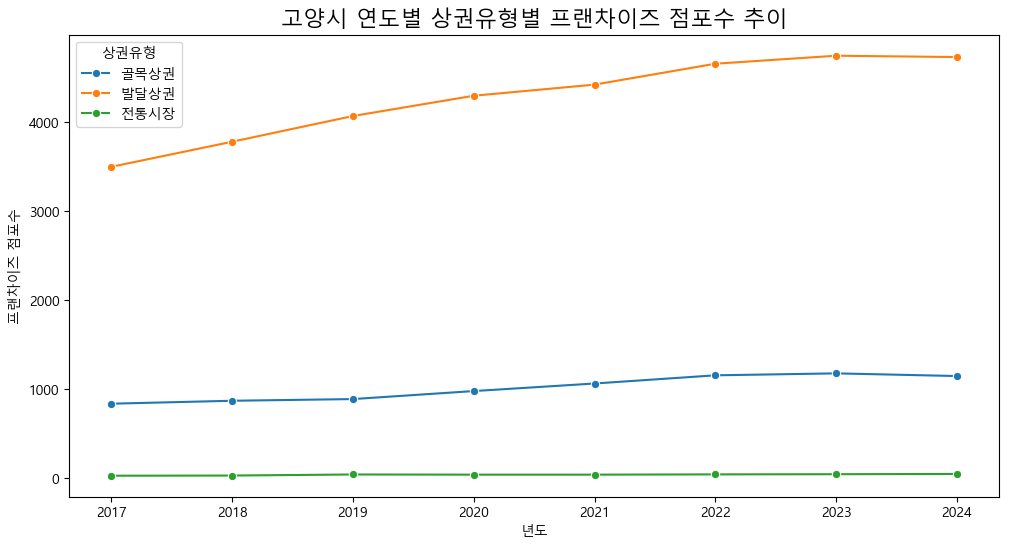

In [20]:
# plot the store counts by year and market area type
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_franchise_data, x='연도', y='프랜차이즈점포수', hue='상권유형', marker='o')
plt.title('고양시 연도별 상권유형별 프랜차이즈 점포수 추이', fontsize=16)
plt.xlabel('년도')
plt.ylabel('프랜차이즈 점포수')
plt.legend(title='상권유형')
plt.show()